In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
inflows = pd.read_parquet('../data/ucsd-inflows.pqt')
outflows = pd.read_parquet('../data/ucsd-outflows.pqt')

### Inflows/Outflows:
- **prism_consumer_id** (quantitative): unique identifier for each consumer (user)
- **prism_account_id** (qualitative): identifier for each account
- **memo** (qualitative): descriptions or labels of transactions
- **amount** (quantitative): value of the transaction
- **posted_date** (qualitative): date when the transaction was posted
- **category** (qualitative): transaction type

In [3]:
# check for missing values (there are no missing values)
print("\nMissing values in inflows:")
print(inflows.isnull().sum())
print("\nMissing values in outflows:")
print(outflows.isnull().sum())


Missing values in inflows:
prism_consumer_id    0
prism_account_id     0
memo                 0
amount               0
posted_date          0
category             0
dtype: int64

Missing values in outflows:
prism_consumer_id    0
prism_account_id     0
memo                 0
amount               0
posted_date          0
category             0
dtype: int64


# Inflow Data Exploration

In [4]:
inflows.head()

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER


In [5]:
for column in inflows.columns:
    current_column = inflows[column]
    unique_values = len(current_column.unique())
    column_description = current_column.describe()
    print(f"Column: {column}: \nDtypes of {column_description.dtype}")
    print(f"Shape: {column_description['count']}")
    print(f"Unique Values: {unique_values}\n")

Column: prism_consumer_id: 
Dtypes of float64
Shape: 513115.0
Unique Values: 2974

Column: prism_account_id: 
Dtypes of object
Shape: 513115
Unique Values: 4727

Column: memo: 
Dtypes of object
Shape: 513115
Unique Values: 14

Column: amount: 
Dtypes of float64
Shape: 513115.0
Unique Values: 84647

Column: posted_date: 
Dtypes of object
Shape: 513115
Unique Values: 1753

Column: category: 
Dtypes of object
Shape: 513115
Unique Values: 14



In [6]:
# unique categories of the inflows data

in_categories = inflows['category'].value_counts()
in_categories

category
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

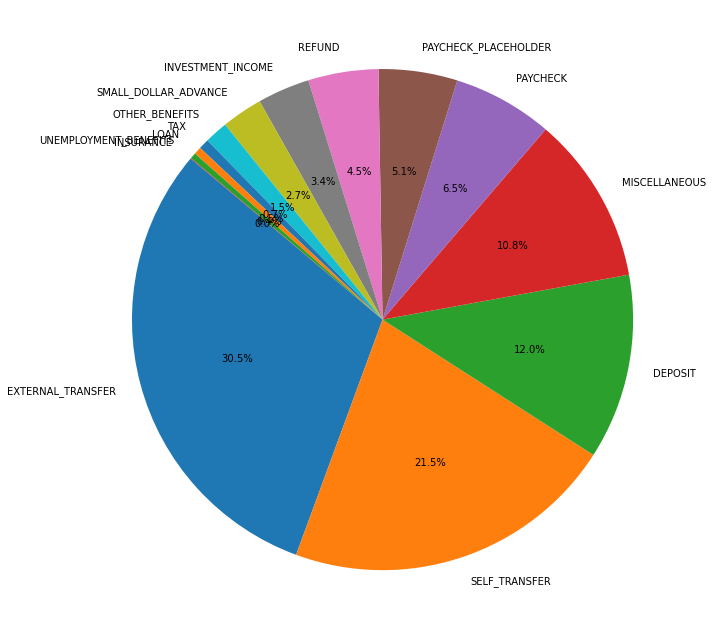

In [7]:
# let's create a pie chart looking at the categories, and which are most common and which are least

categories = inflows['category'].value_counts()
plt.figure(figsize=(16, 9))
_ = plt.pie(categories, labels = categories.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()

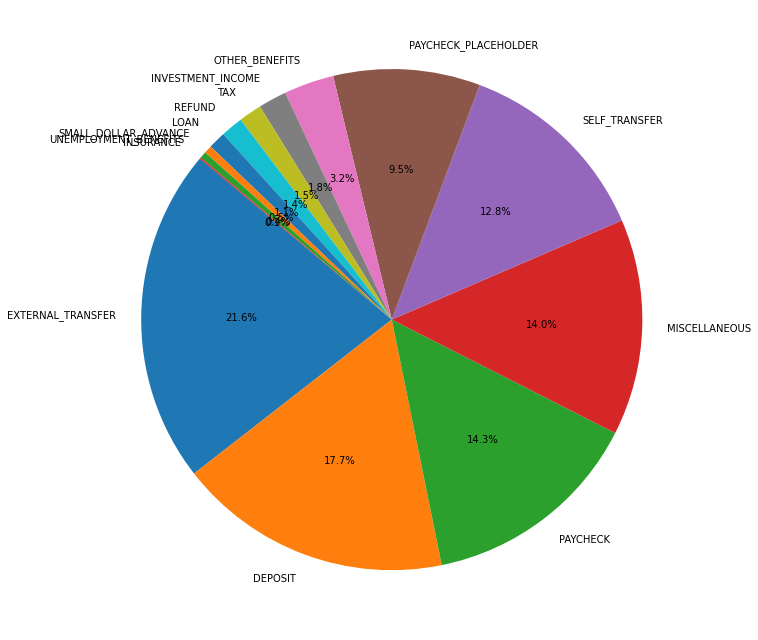

In [8]:
# Let's check how this looks in terms of total cost of spending, instead of just the number of transactions

category_cost = inflows.groupby('category')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(16, 9))
_ = plt.pie(category_cost, labels = category_cost.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()

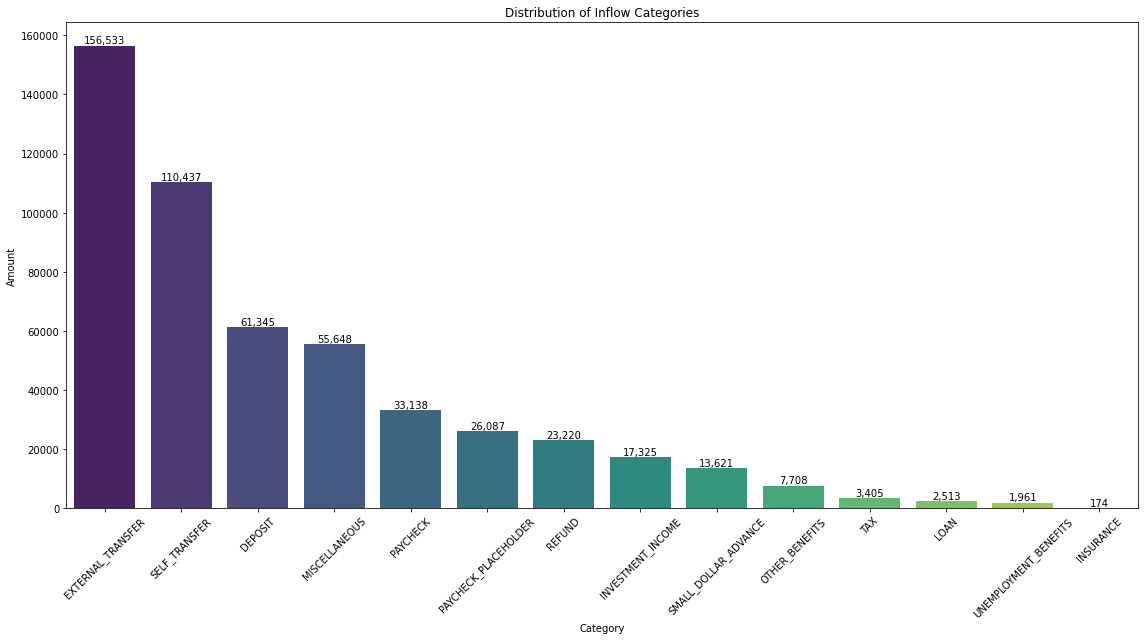

In [9]:
#frequency of categories

plt.figure(figsize=(16, 9))
bar_plot = sns.barplot(x=in_categories.index, y=in_categories, palette="viridis")

# Add labels on top of the bars
for index, value in enumerate(in_categories):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# Set plot details
plt.title("Distribution of Inflow Categories")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [10]:
category_gain = inflows.groupby('category')['amount'].sum().sort_values(ascending=False)
inflows['posted_date'] = pd.to_datetime(inflows['posted_date'])

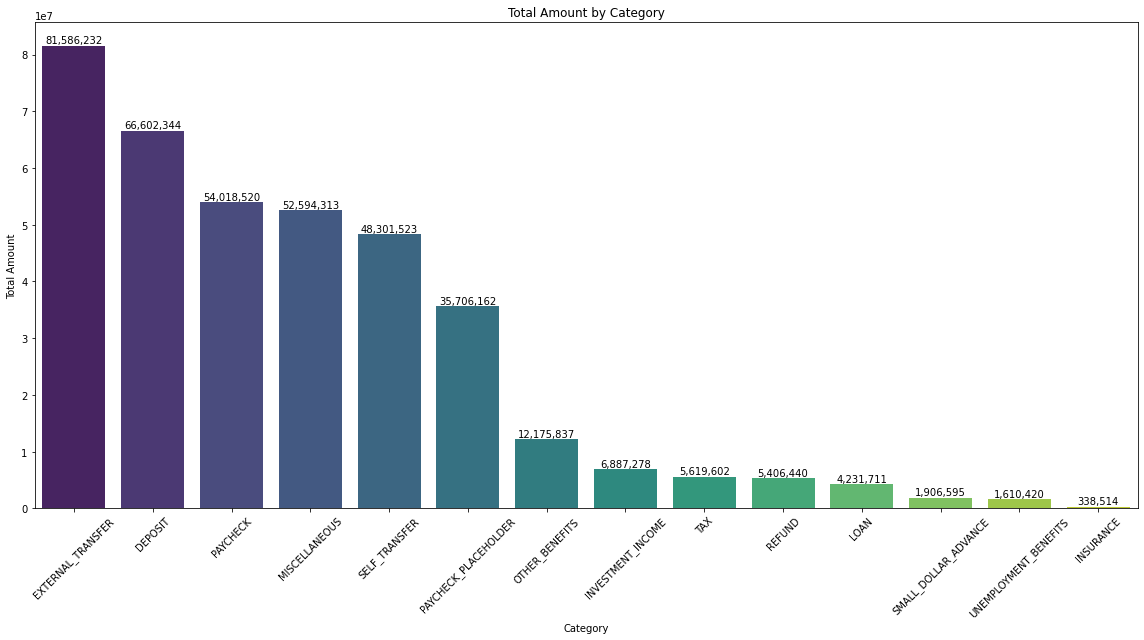

In [11]:
# total inflow per category

plt.figure(figsize=(16, 9))
bar_plot = sns.barplot(x=category_gain.index, y=category_gain, palette="viridis")

# Add labels on top of the bars
for index, value in enumerate(category_gain):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# Set plot details
plt.title("Total Amount by Category")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

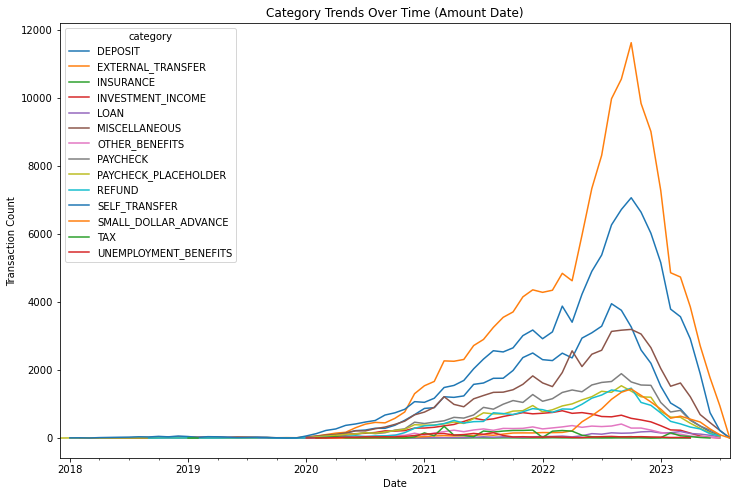

In [12]:
# total transaction per category over time

plt.figure(figsize=(12, 8))
inflows.groupby([inflows['posted_date'].dt.to_period('M'), 'category']).size().unstack().plot(kind='line', ax=plt.gca())
plt.title('Category Trends Over Time (Amount Date)')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

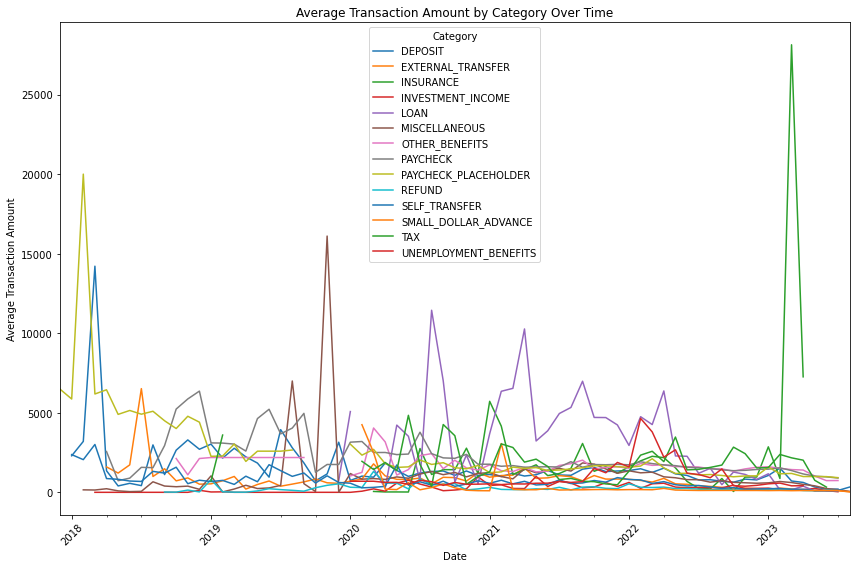

In [13]:
# average transaction amount per category over time

inflows['posted_date'] = pd.to_datetime(inflows['posted_date'])
avg_transaction = inflows.groupby([inflows['posted_date'].dt.to_period('M'), 'category'])['amount'].mean().unstack()

# Plot the result
plt.figure(figsize=(12, 8))
avg_transaction.plot(kind='line', ax=plt.gca())
plt.title('Average Transaction Amount by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

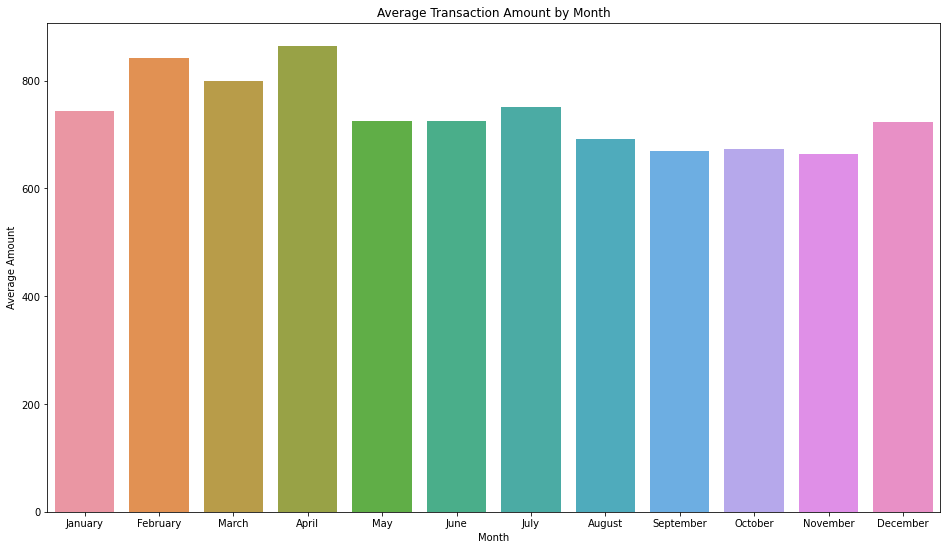

In [14]:
months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Convert 'posted_date' to datetime and extract the month
inflows['posted_date'] = pd.to_datetime(inflows['posted_date'])
inflows['month'] = inflows['posted_date'].dt.month_name()

# Group by month and calculate average amount
monthly_average = inflows.groupby('month')['amount'].mean().reindex(months)

# Plot the results
plt.figure(figsize=(16, 9))
sns.barplot(x=monthly_average.index, y=monthly_average)
plt.title("Average Transaction Amount by Month")
plt.xlabel("Month")
plt.ylabel("Average Amount")
plt.show()

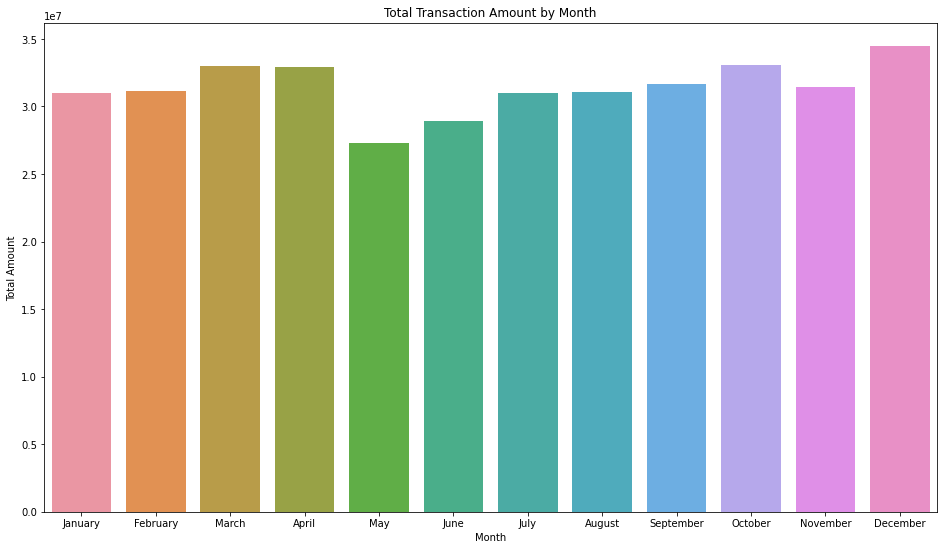

In [15]:
# Group by month and calculate average amount
monthly_total = inflows.groupby('month')['amount'].sum().reindex(months)

# Plot the results
plt.figure(figsize=(16, 9))
sns.barplot(x=monthly_total.index, y=monthly_total)
plt.title("Total Transaction Amount by Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()

<AxesSubplot:xlabel='posted_date', ylabel='count'>

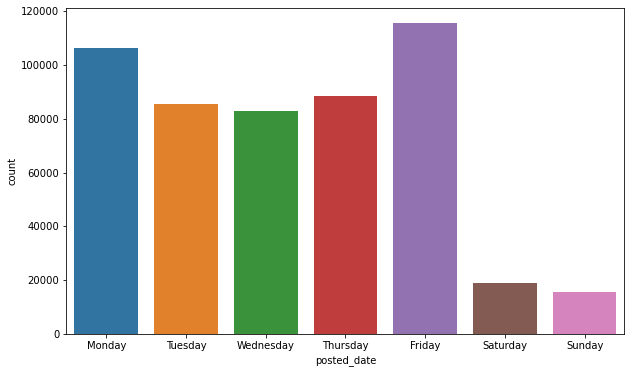

In [16]:
# let's look at what days of the week people are having the most transactions on
dates = pd.to_datetime(inflows['posted_date'])
day_of_week = dates.dt.day_name()
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))
counts = day_of_week.value_counts().reindex(days_order)

sns.barplot(x=counts.index, y=counts)

<AxesSubplot:xlabel='day', ylabel='amount'>

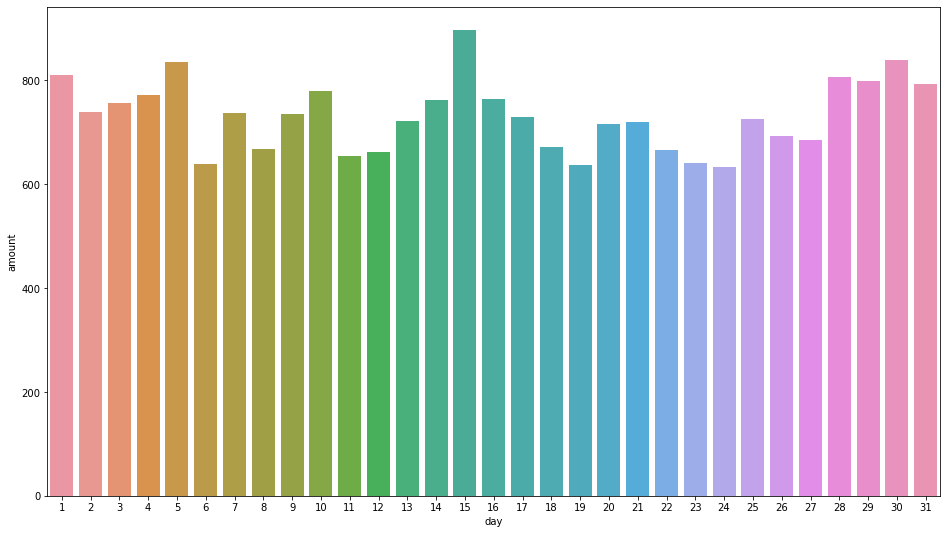

In [17]:
# Let's look at if there is a semblance of a pattern when looking at specific dates, and the amount of spending that happens on those days
numerical_categories = inflows[["amount", "posted_date"]].copy()
numerical_categories["posted_date"] = dates
numerical_categories["day"] = numerical_categories["posted_date"].dt.day
daily_average = numerical_categories.groupby("day")["amount"].mean()

plt.figure(figsize=(16, 9))
sns.barplot(x = daily_average.index, y = daily_average)

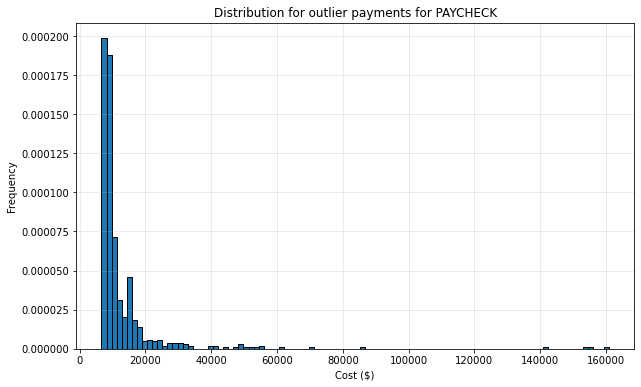

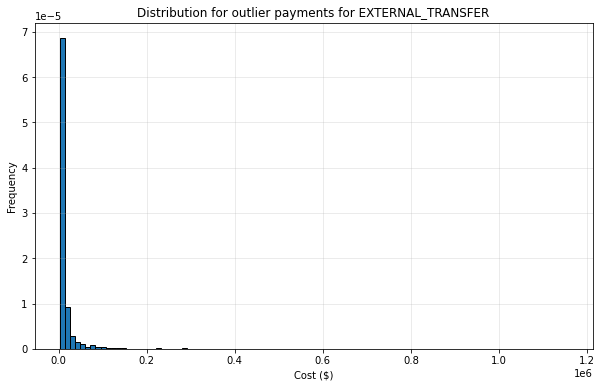

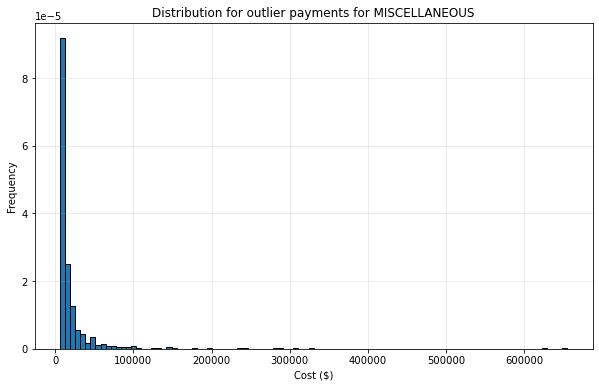

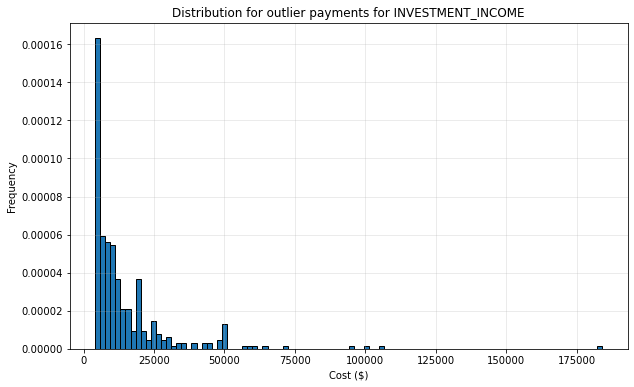

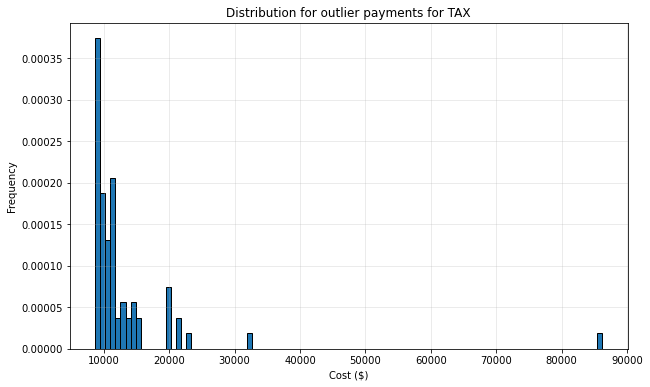

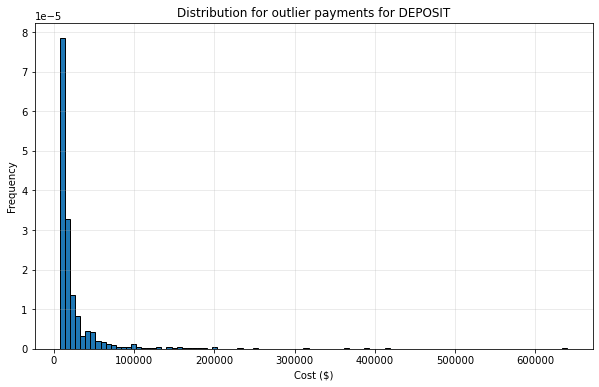

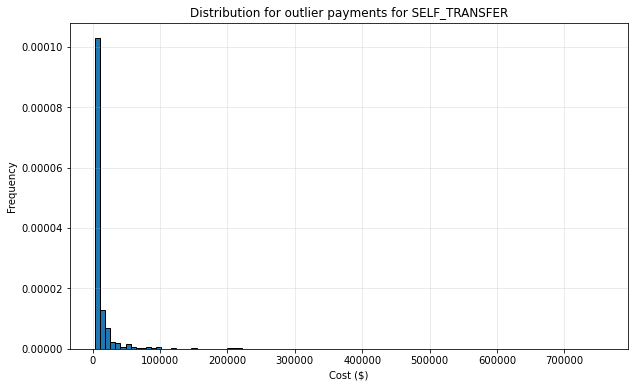

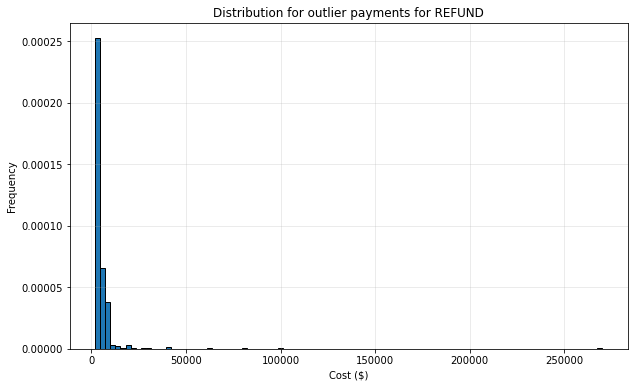

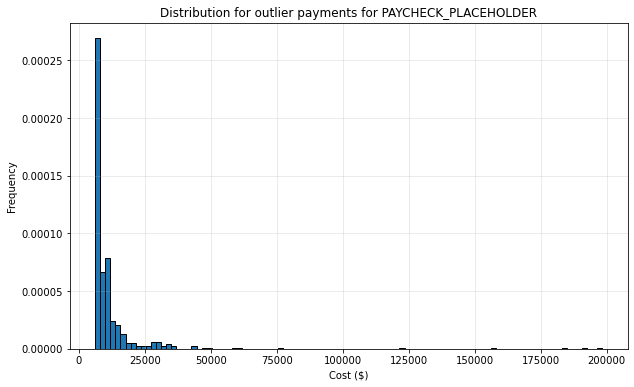

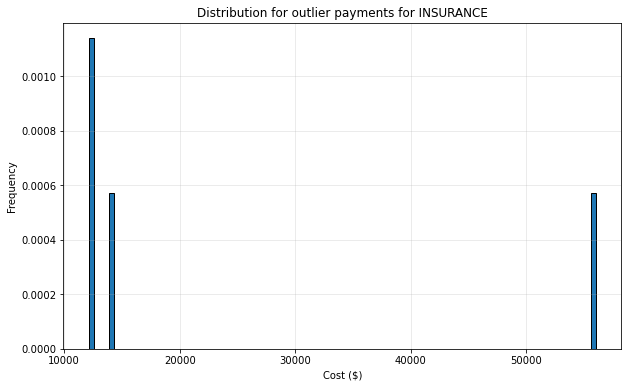

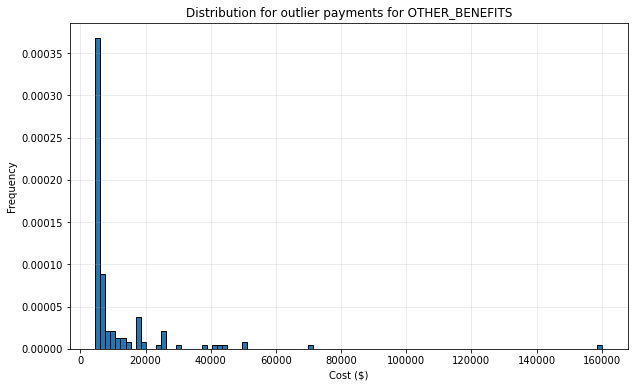

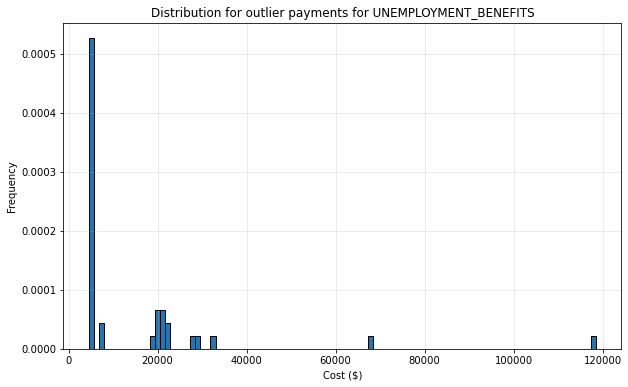

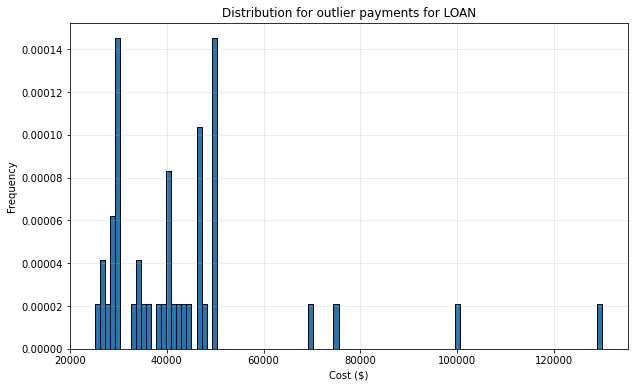

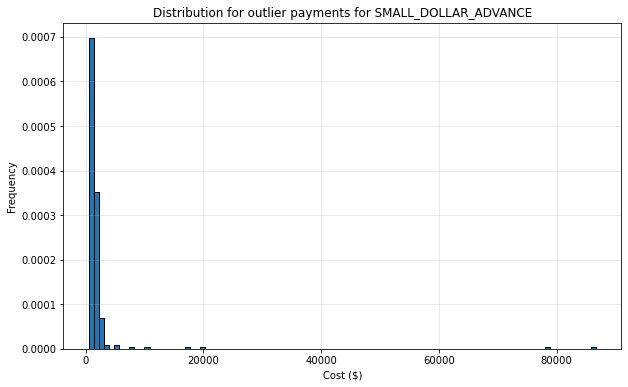

In [18]:
# outliers for inflows
categories = inflows["category"].unique()

# plotting all spending for different categories
for cat in categories:
    # limit to 95% of the spending (ignoring the top 5%)
    gain = inflows[inflows["category"] == cat]["amount"]

    threshold = np.percentile(gain, 98)
    everyday_spending = gain[gain > threshold]

    plt.figure(figsize=(10, 6))
    plt.hist(everyday_spending, bins=100, edgecolor="black", density=True)

    plt.xlabel(f"Cost ($)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution for outlier payments for {cat}")

    plt.grid(True, alpha=0.3)
    plt.show()

In [19]:
common_merchant_inflow = inflows.groupby(['category', 'memo'])[['prism_consumer_id']].count().sort_values(by='prism_consumer_id', ascending=False).groupby('category').head(1)

In [20]:
common_merchant_inflow

,,prism_consumer_id
category,memo,
EXTERNAL_TRANSFER,EXTERNAL_TRANSFER,156533
SELF_TRANSFER,SELF_TRANSFER,110437
DEPOSIT,DEPOSIT,61345
MISCELLANEOUS,MISCELLANEOUS,55648
PAYCHECK,PAYCHECK,33138
PAYCHECK_PLACEHOLDER,PAYCHECK_PLACEHOLDER,26087
REFUND,REFUND,23220
INVESTMENT_INCOME,INVESTMENT_INCOME,17325
SMALL_DOLLAR_ADVANCE,SMALL_DOLLAR_ADVANCE,13621


# Outflow Data Exploration

In [21]:
outflows.head()

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES


In [22]:
for column in outflows.columns:
    current_column = outflows[column]
    unique_values = len(current_column.unique())
    column_description = current_column.describe()
    print(f"Column: {column}: \nDtypes of {column_description.dtype}")
    print(f"Shape: {column_description['count']}")
    print(f"Unique Values: {unique_values}\n")

Column: prism_consumer_id: 
Dtypes of float64
Shape: 2597488.0
Unique Values: 2968

Column: prism_account_id: 
Dtypes of object
Shape: 2597488
Unique Values: 4622

Column: memo: 
Dtypes of object
Shape: 2597488
Unique Values: 528786

Column: amount: 
Dtypes of float64
Shape: 2597488.0
Unique Values: 72262

Column: posted_date: 
Dtypes of object
Shape: 2597488
Unique Values: 1952

Column: category: 
Dtypes of object
Shape: 2597488
Unique Values: 29



In [23]:
# unique categories of the outflows data

outflows['category'].value_counts()

category
GENERAL_MERCHANDISE    524063
FOOD_AND_BEVERAGES     481994
EXTERNAL_TRANSFER      320998
GROCERIES              219331
AUTOMOTIVE             208579
ATM_CASH               117651
UNCATEGORIZED          117409
LOAN                    90945
ENTERTAINMENT           80885
ESSENTIAL_SERVICES      77137
CREDIT_CARD_PAYMENT     75506
SELF_TRANSFER           73281
TRAVEL                  59647
HEALTHCARE_MEDICAL      40842
ACCOUNT_FEES            37511
INSURANCE               30244
PETS                     9266
HOME_IMPROVEMENT         8600
GIFTS_DONATIONS          4719
EDUCATION                4499
OVERDRAFT                3386
TAX                      3186
RENT                     3147
BNPL                     1543
MORTGAGE                 1119
PAYCHECK                 1040
CHILD_DEPENDENTS          936
BILLS_UTILITIES            23
AUTO_LOAN                   1
Name: count, dtype: int64

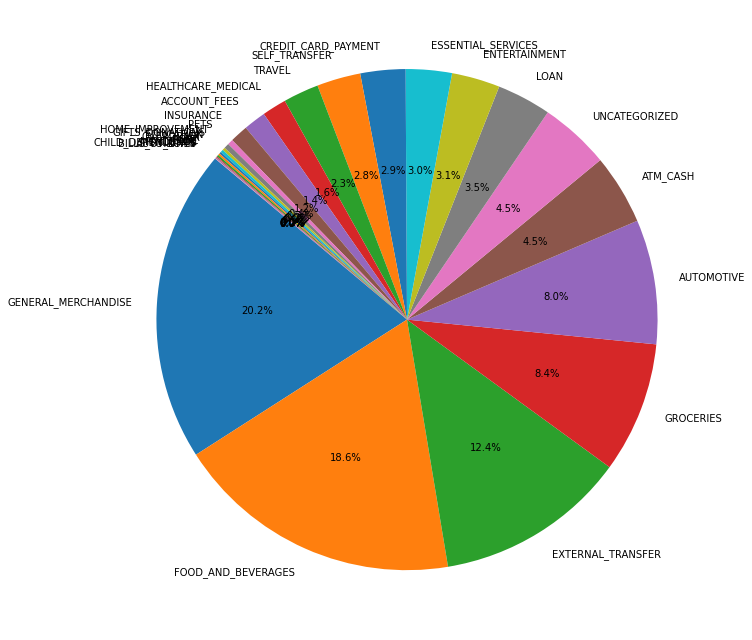

In [24]:
# let's create a pie chart looking at the categories, and which are most common and which are least

categories = outflows['category'].value_counts()
plt.figure(figsize=(16, 9))
_ = plt.pie(categories, labels = categories.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()

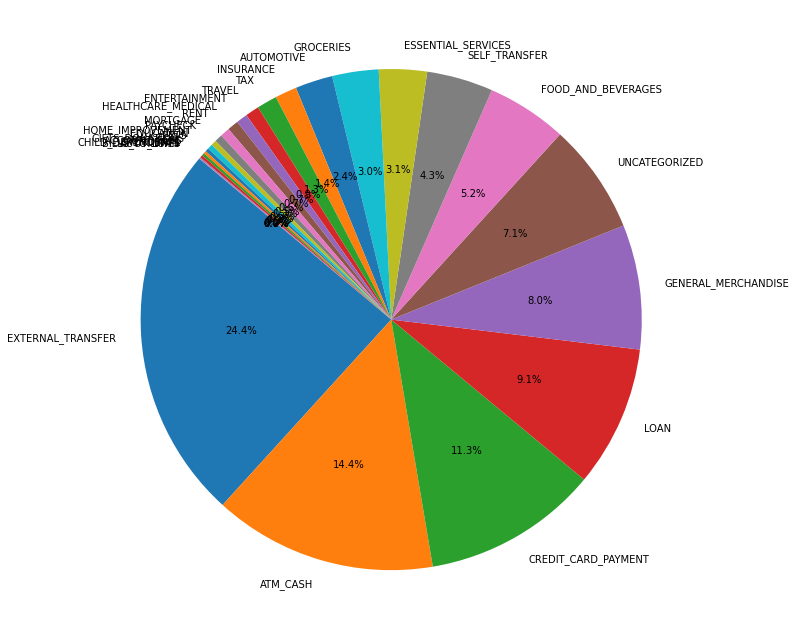

In [25]:
# Let's check how this looks in terms of total cost of spending, instead of just the number of transactions

category_cost = outflows.groupby('category')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(16, 9))
_ = plt.pie(category_cost, labels = category_cost.index, autopct='%1.1f%%', startangle=140)
plt.tight_layout()

In [26]:
payments = outflows["amount"]
payments.describe()

# NOTE: the max in payments is $654853. Let's get rid of this outlier so we can have a better grasp on the normal amounts people spend
# One arbritary amount is 95%, so let's get rid of 5% of the data to illustrate the type of payments that most people make
threshold = np.percentile(payments, 95)
everyday_payments = payments[payments <= threshold]

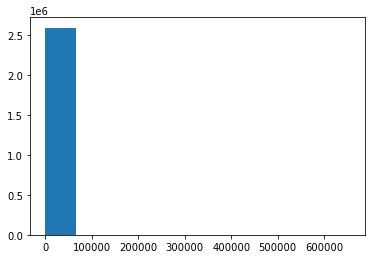

In [27]:
plt.hist(payments)
plt.show()

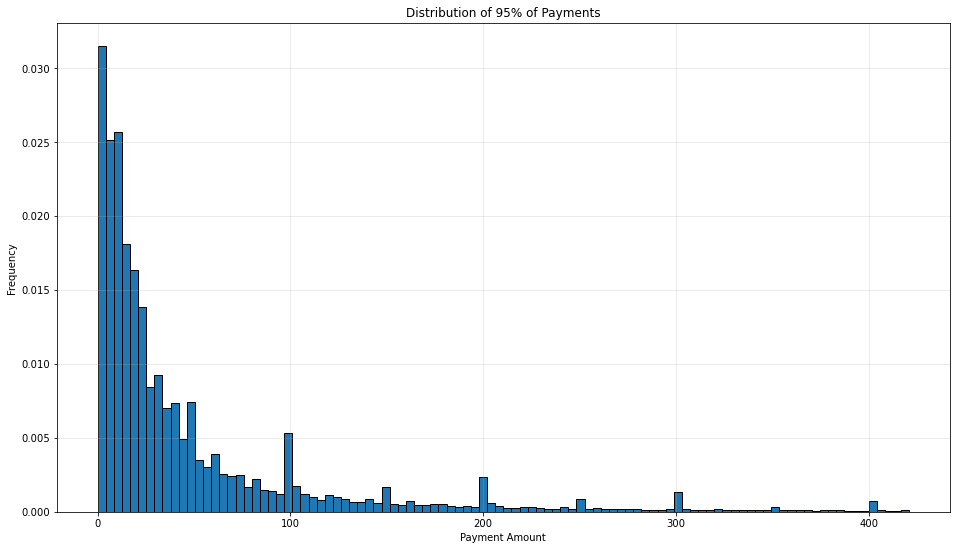

In [28]:
# NOTE: the max in payments is $654853. Let's get rid of this outlier so we can have a better grasp on the normal amounts people spend
#
# histograms of the quantitative data

plt.figure(figsize=(16, 9))
plt.hist(everyday_payments, bins=100, edgecolor="black", density=True)

plt.xlabel("Payment Amount")
plt.ylabel("Frequency")
plt.title("Distribution of 95% of Payments")

plt.grid(True, alpha=0.3)
plt.show()

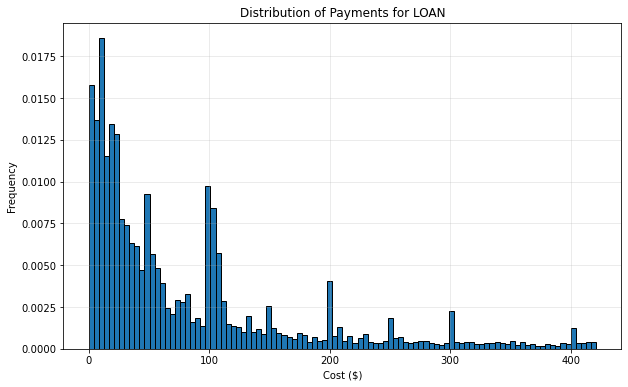

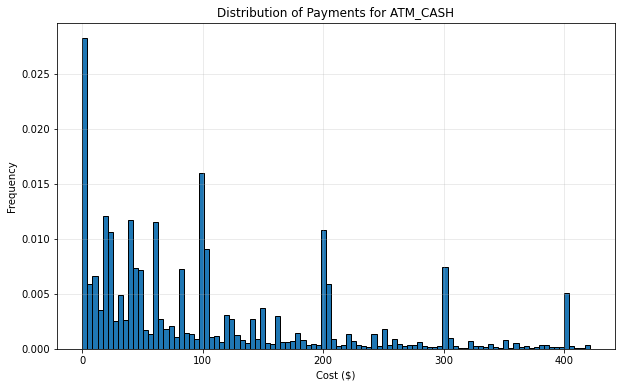

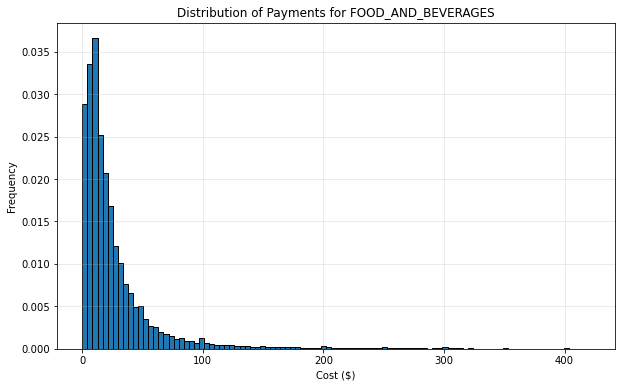

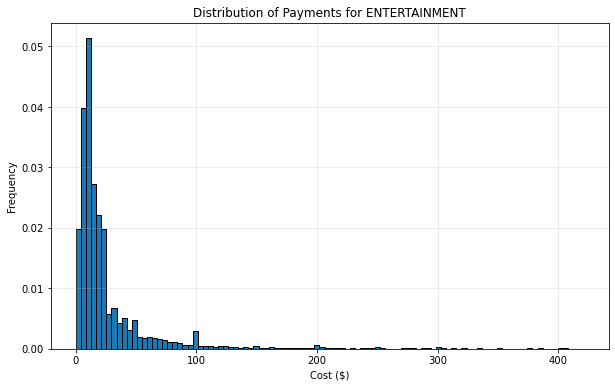

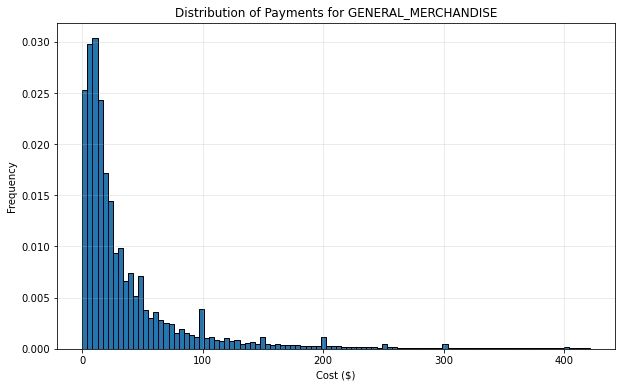

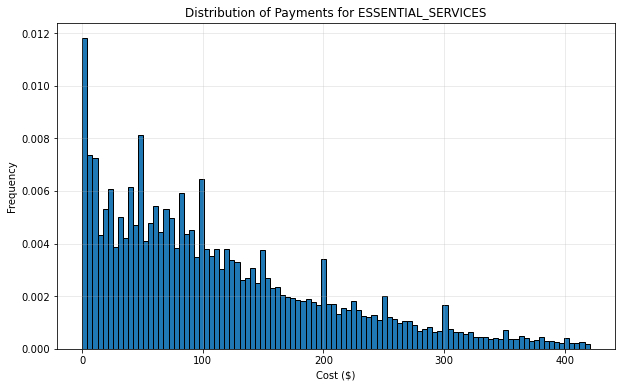

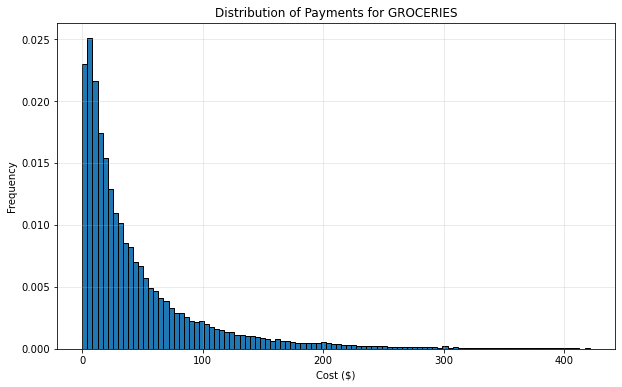

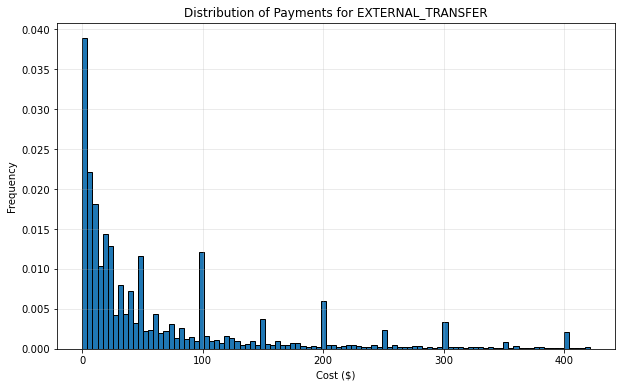

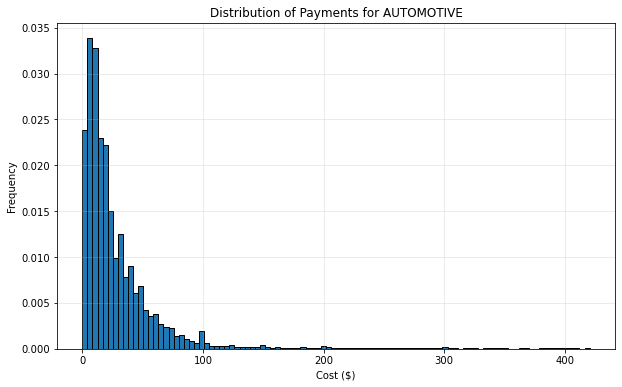

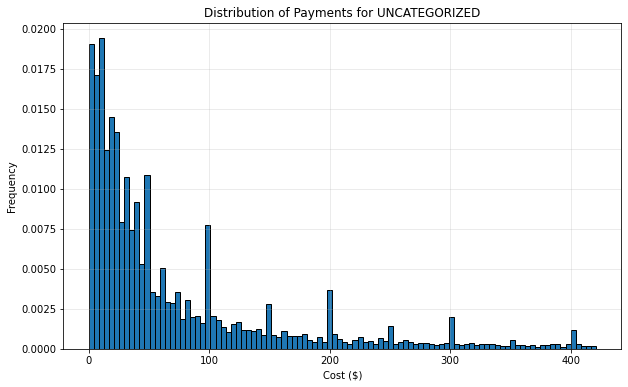

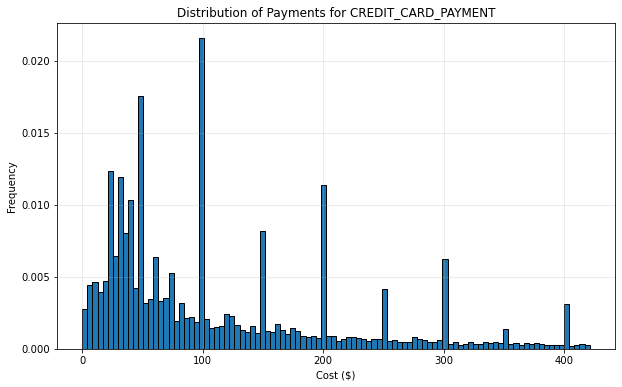

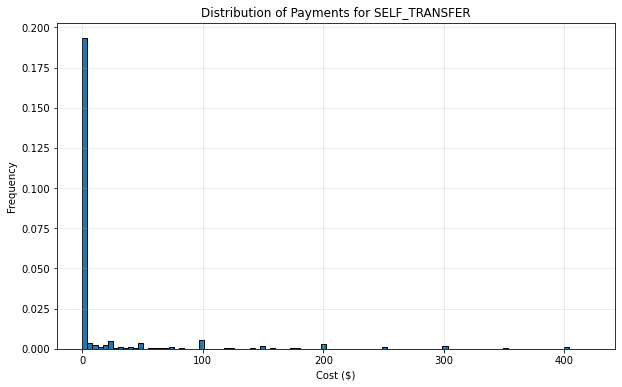

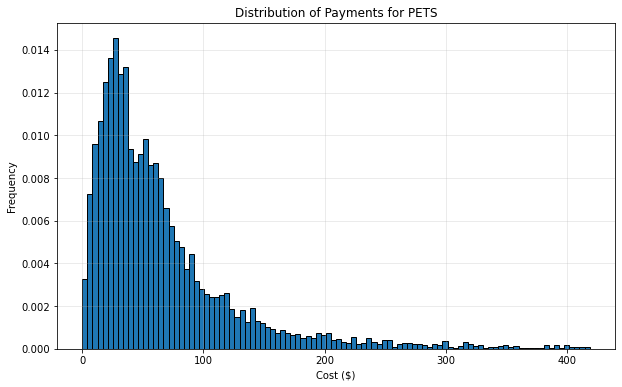

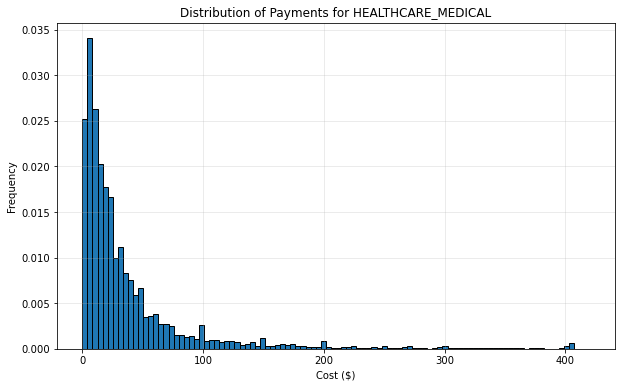

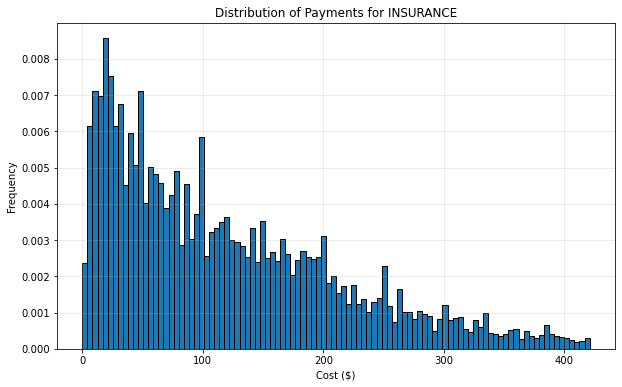

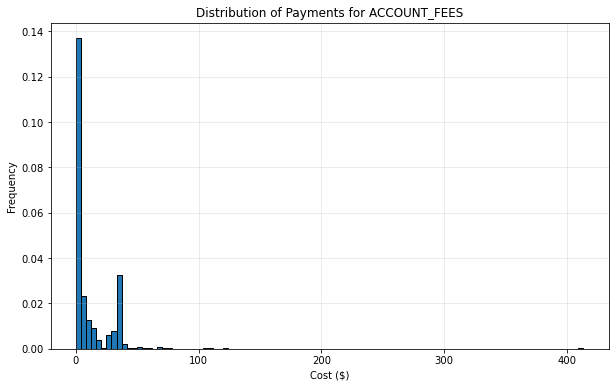

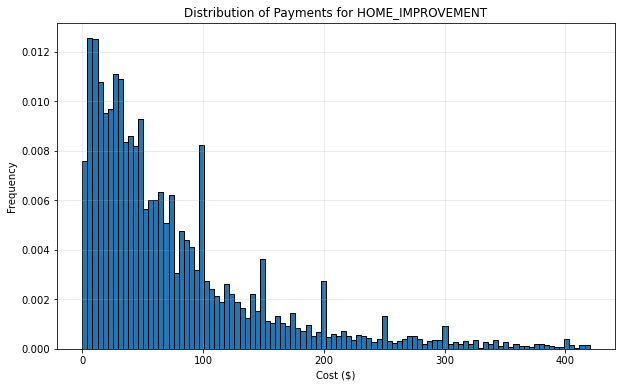

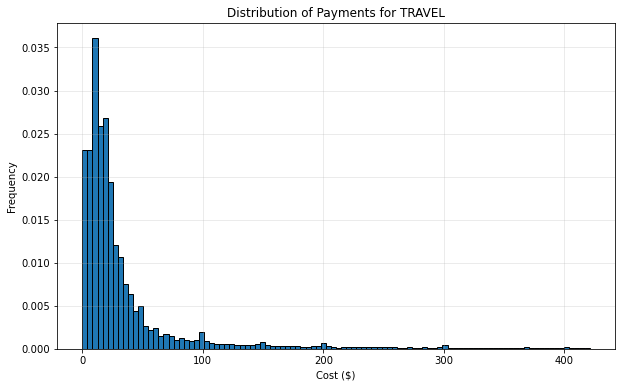

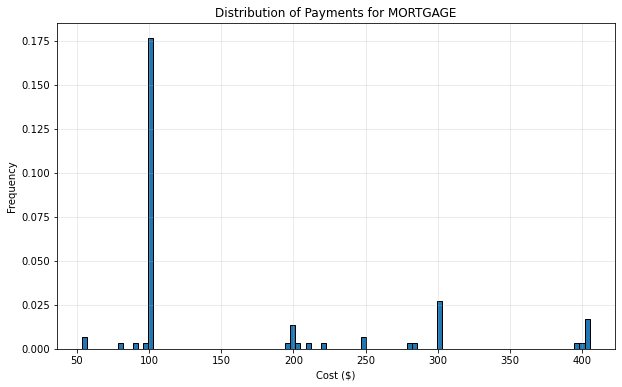

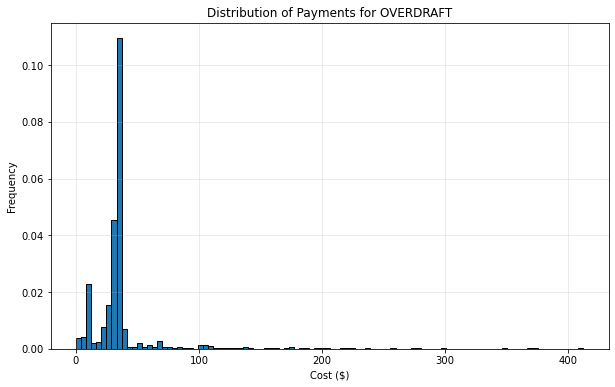

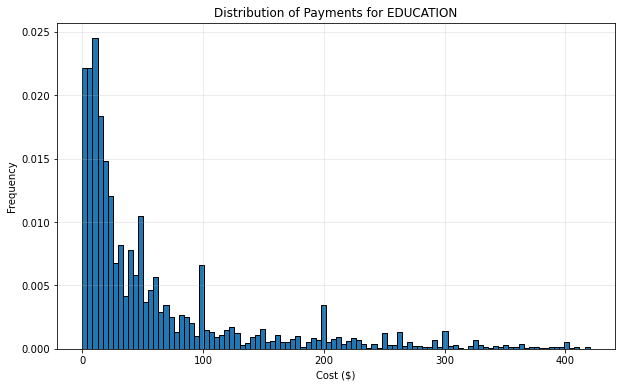

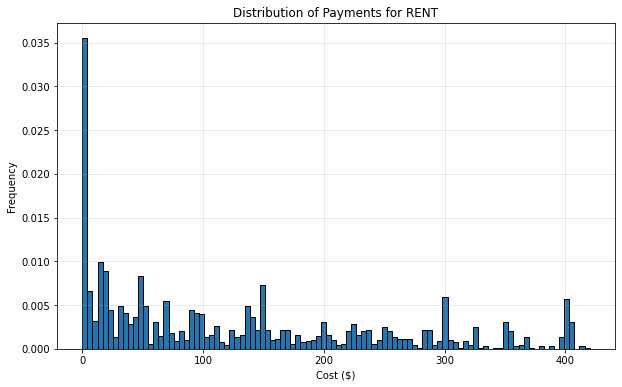

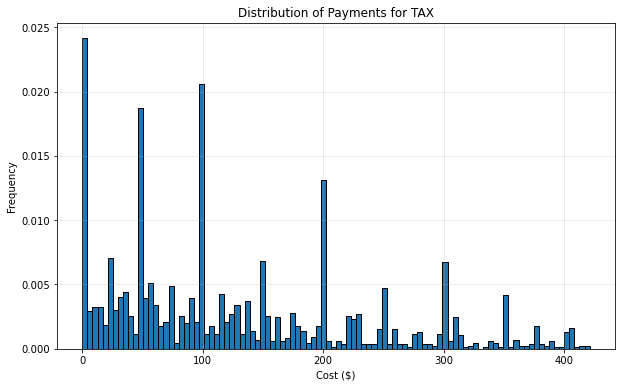

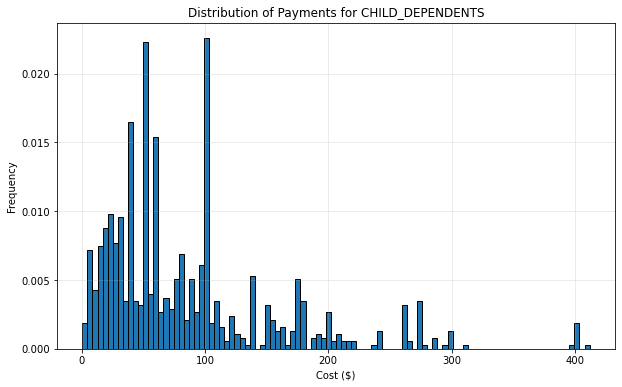

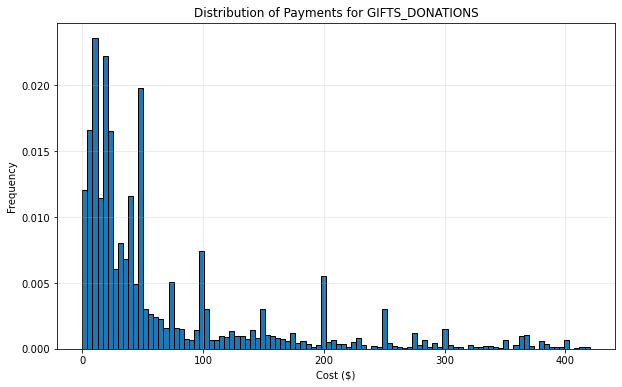

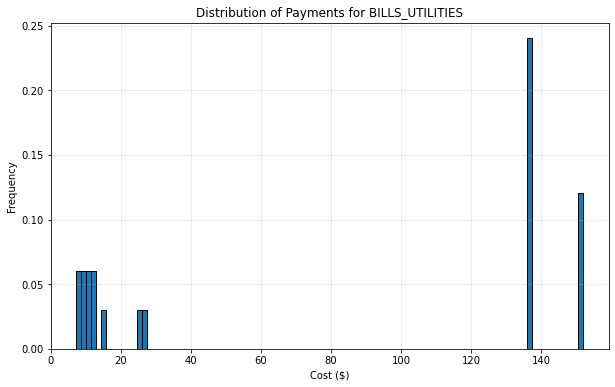

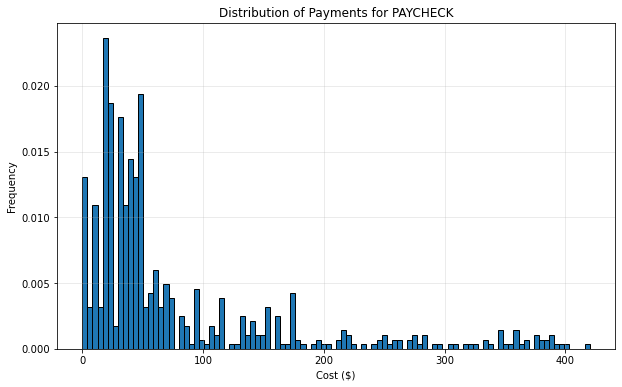

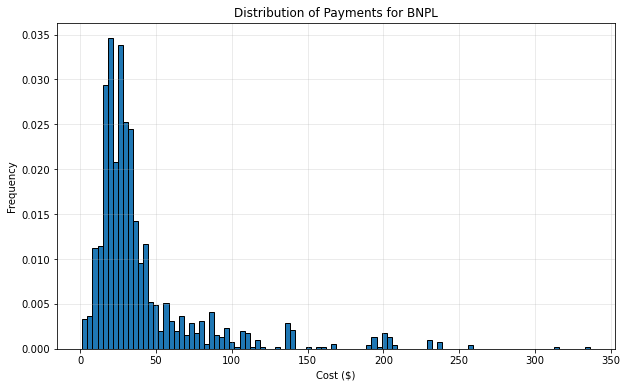

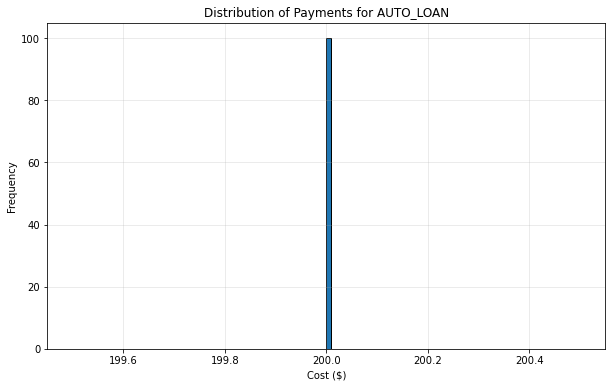

In [29]:
categories = outflows['category'].unique()

# plotting all spending for different categories
for cat in categories:
    # let's also limit these to 95% of the spending (ignoring the top 5%)
    spending = outflows[outflows['category'] == cat]['amount']

    threshold = np.percentile(payments, 95)
    everyday_spending = spending[spending <= threshold]
    
    plt.figure(figsize=(10, 6))
    plt.hist(everyday_spending, bins=100, edgecolor="black", density=True)

    plt.xlabel(f"Cost ($)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Payments for {cat}")

    plt.grid(True, alpha=0.3)
    plt.show()

In [30]:
# First, let's check if the data is all formmated correctly into dates
dates = outflows["posted_date"]
filtered_dates = dates[dates.apply(lambda x: isinstance(x, date))]

print(
    f"Are any of the dates formatted incorrectly?: {dates.shape[0] != filtered_dates.shape[0]}"
)

Are any of the dates formatted incorrectly?: False


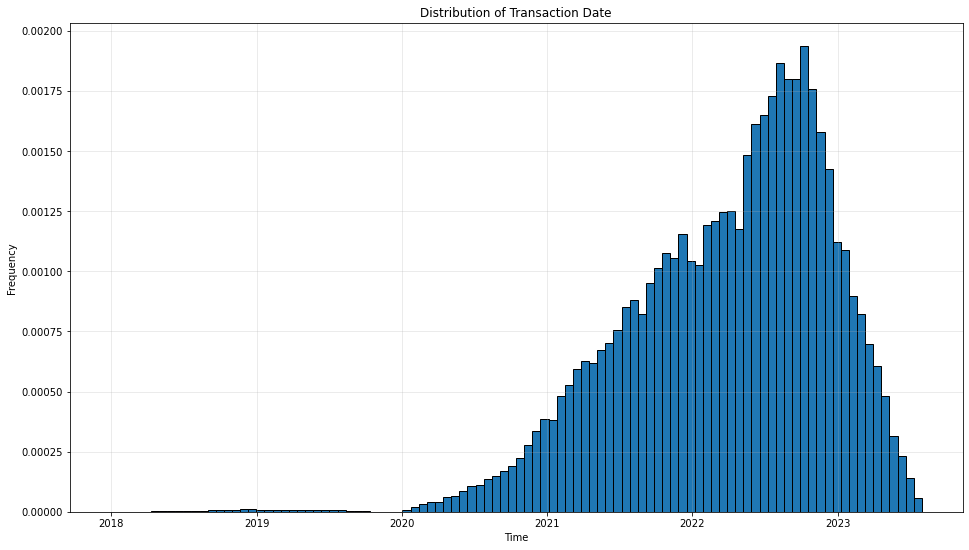

In [31]:
# Therefore, we can progress with time-series data

plt.figure(figsize=(16, 9))
plt.hist(filtered_dates, bins=100, edgecolor="black", density=True)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Date")

plt.grid(True, alpha=0.3)
plt.show()

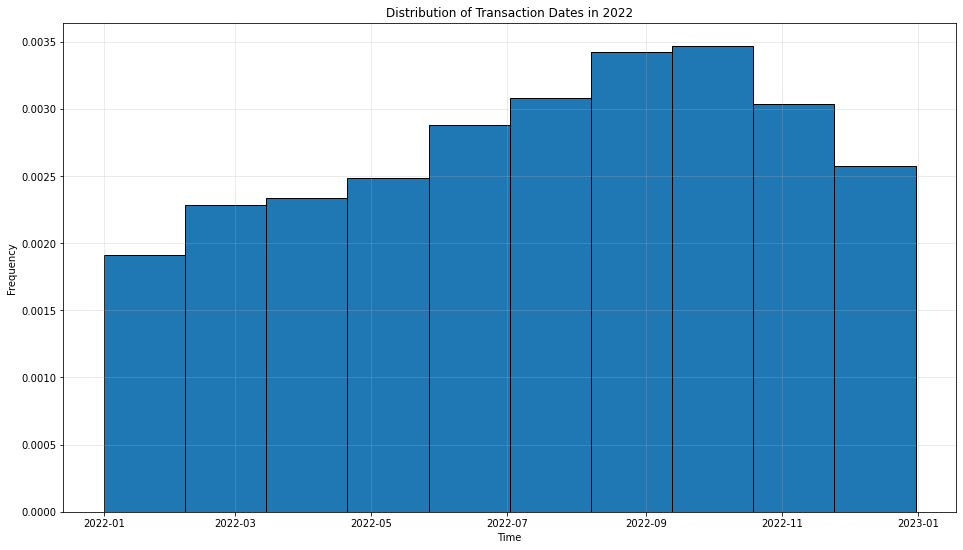

In [32]:
# If we want to get more specific about this, let's look at the year with the most transactions: 2022!
from datetime import date

dates_in_2022 = filtered_dates[
    (filtered_dates > date(2021, 12, 31)) & (filtered_dates < date(2023, 1, 1))
]
plt.figure(figsize=(16, 9))
plt.hist(dates_in_2022, bins=10, edgecolor="black", density=True)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Dates in 2022")

plt.grid(True, alpha=0.3)
plt.show()

<AxesSubplot:xlabel='posted_date', ylabel='count'>

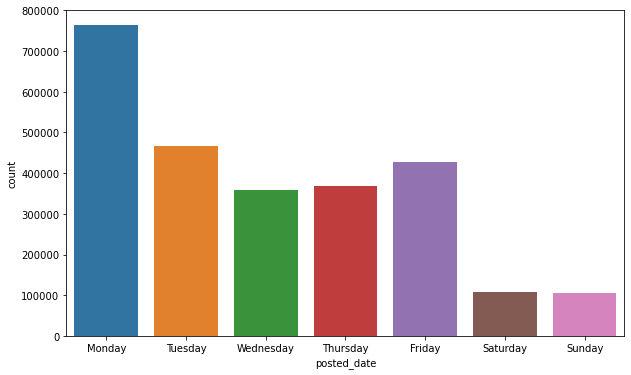

In [33]:
# let's look at what days of the week people are having the most transactions on
filtered_dates = pd.to_datetime(filtered_dates)
day_of_week = filtered_dates.dt.day_name()
days_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))
counts = day_of_week.value_counts().reindex(days_order)

sns.barplot(x=counts.index, y=counts)

<AxesSubplot:xlabel='day', ylabel='amount'>

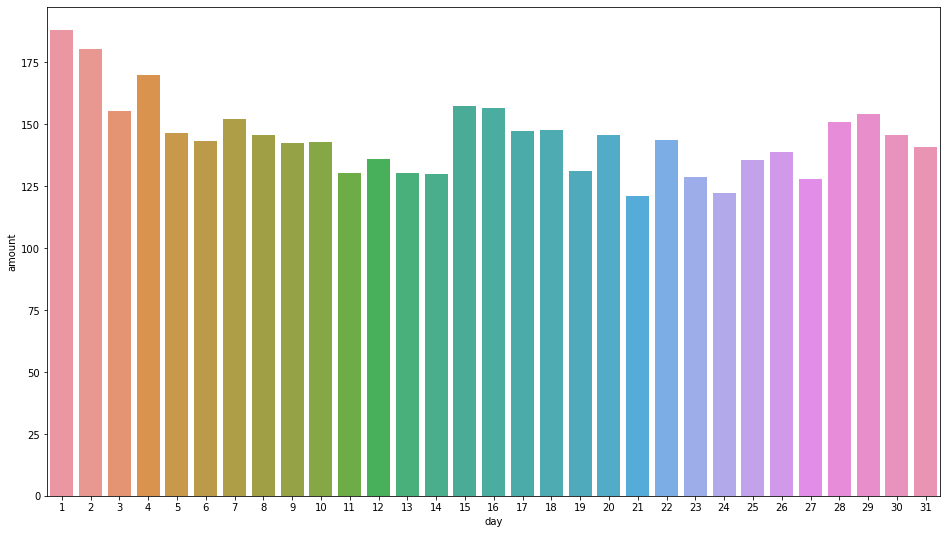

In [34]:
# Let's look at if there is a semblance of a pattern when looking at specific dates, and the amount of spending that happens on those days
numerical_categories = outflows[["amount", "posted_date"]].copy()
numerical_categories["posted_date"] = pd.to_datetime(
    numerical_categories["posted_date"]
)
numerical_categories["day"] = numerical_categories["posted_date"].dt.day
daily_average = numerical_categories.groupby("day")["amount"].mean()

plt.figure(figsize=(16, 9))
sns.barplot(x = daily_average.index, y = daily_average)

<AxesSubplot:xlabel='month', ylabel='amount'>

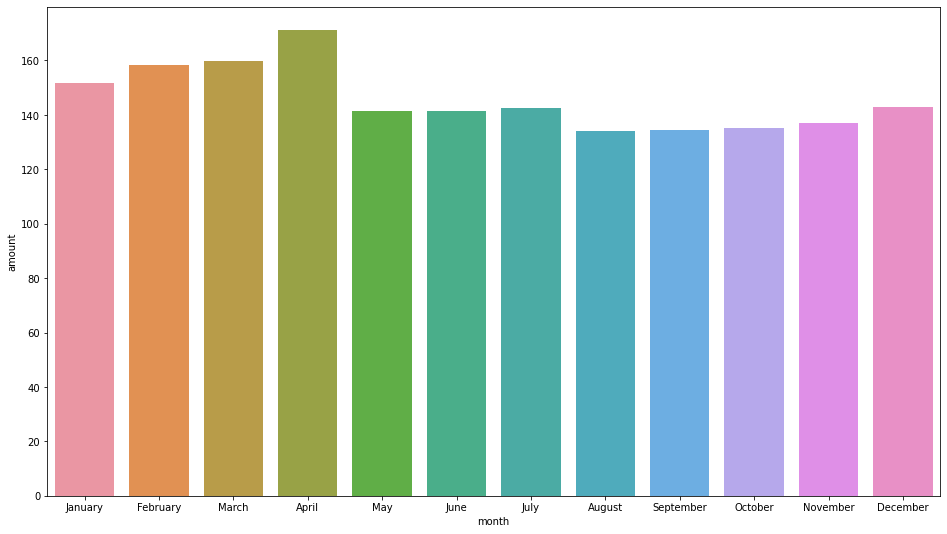

In [35]:
# Now, let's analyze the relationship between numerical data (i.e. the time and the transaction amount)
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

numerical_categories = outflows[["amount", "posted_date"]].copy()
numerical_categories["posted_date"] = pd.to_datetime(
    numerical_categories["posted_date"]
)
numerical_categories["month"] = numerical_categories["posted_date"].dt.month_name()
monthly_average = numerical_categories.groupby("month")["amount"].mean().reindex(months)

plt.figure(figsize=(16, 9))
sns.barplot(x=monthly_average.index, y=monthly_average)

<AxesSubplot:xlabel='month', ylabel='amount'>

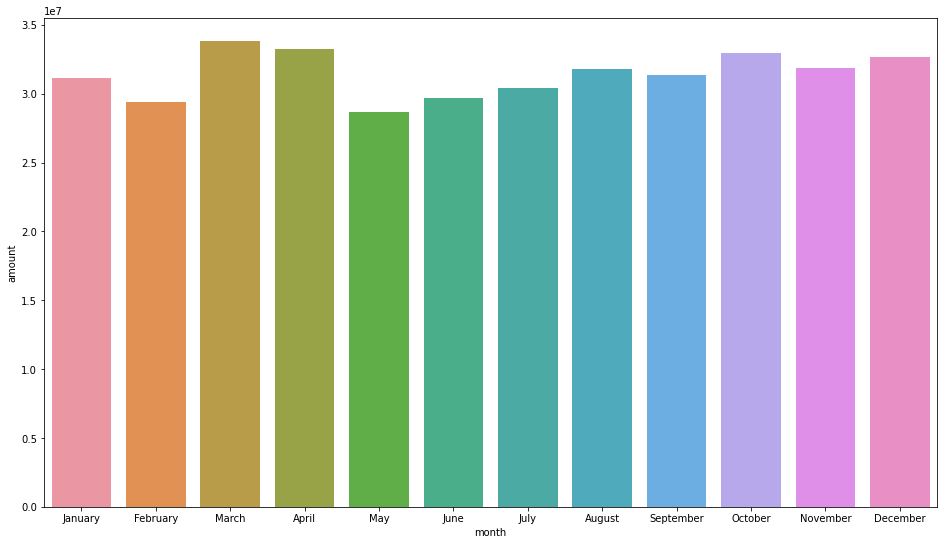

In [36]:
# Now, let's analyze the relationship between numerical data (i.e. the time and the transaction amount)
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

numerical_categories = outflows[["amount", "posted_date"]].copy()
numerical_categories["posted_date"] = pd.to_datetime(
    numerical_categories["posted_date"]
)
numerical_categories["month"] = numerical_categories["posted_date"].dt.month_name()
monthly_average = numerical_categories.groupby("month")["amount"].sum().reindex(months)

plt.figure(figsize=(16, 9))
sns.barplot(x=monthly_average.index, y=monthly_average)

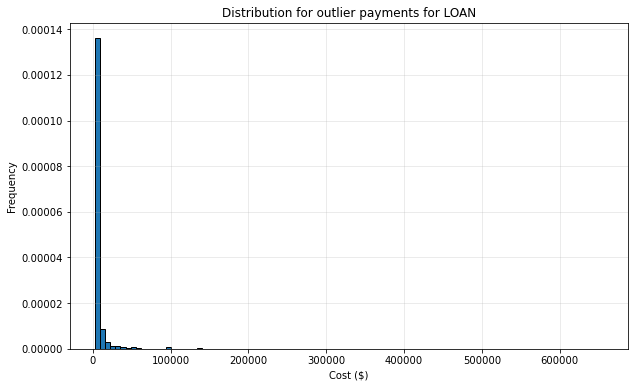

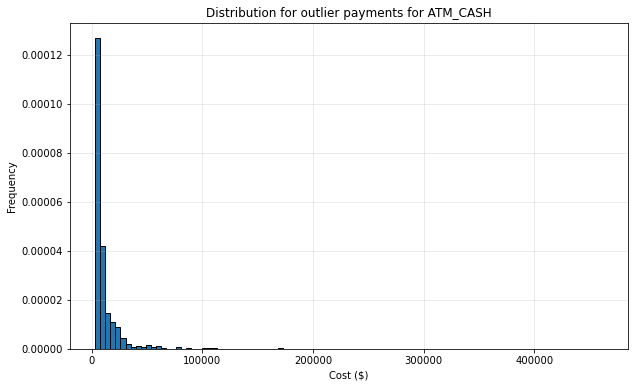

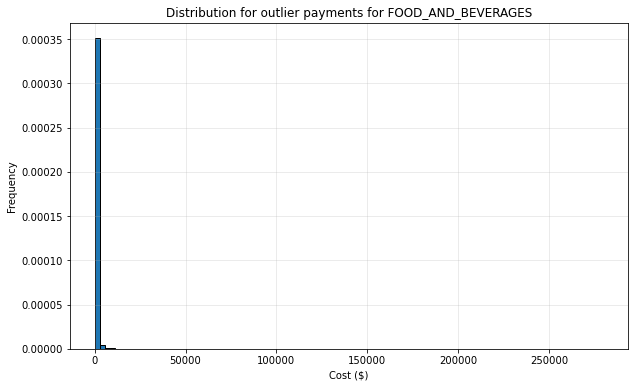

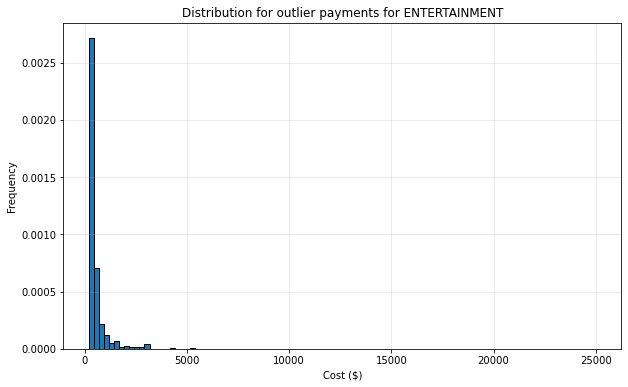

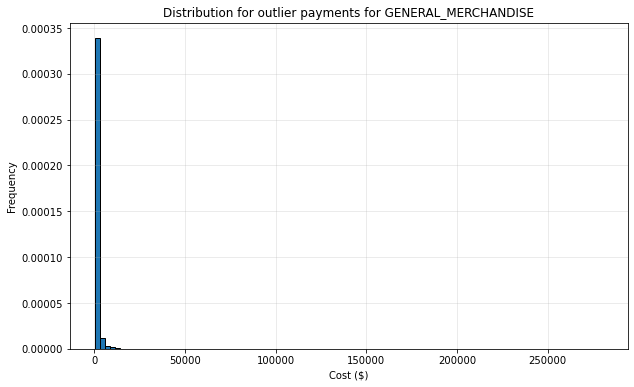

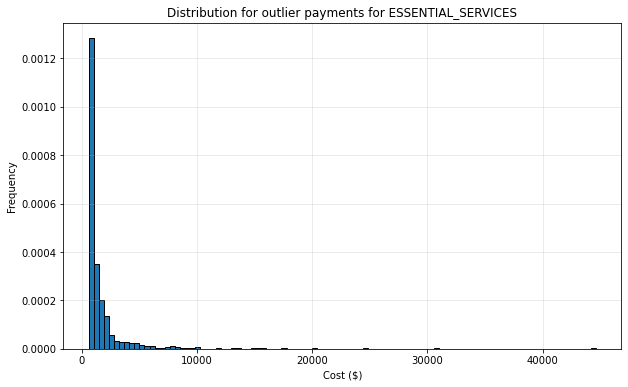

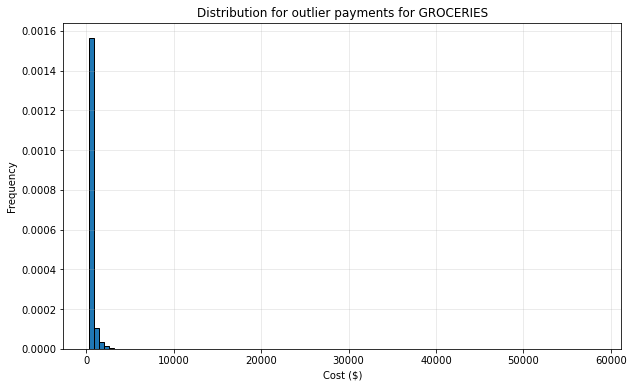

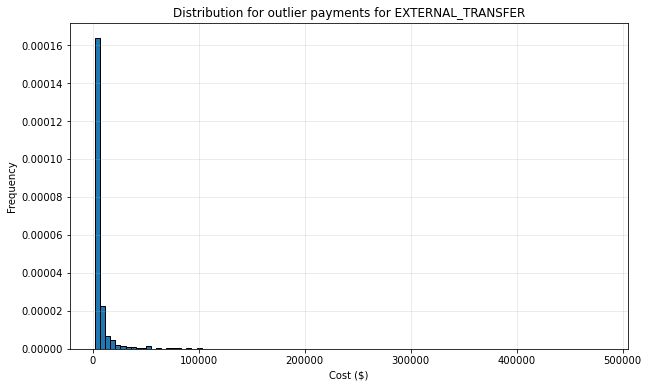

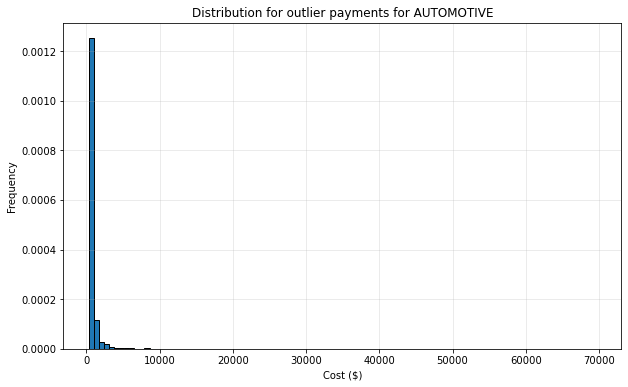

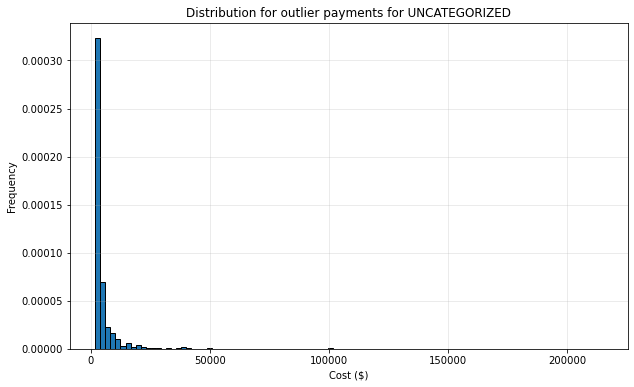

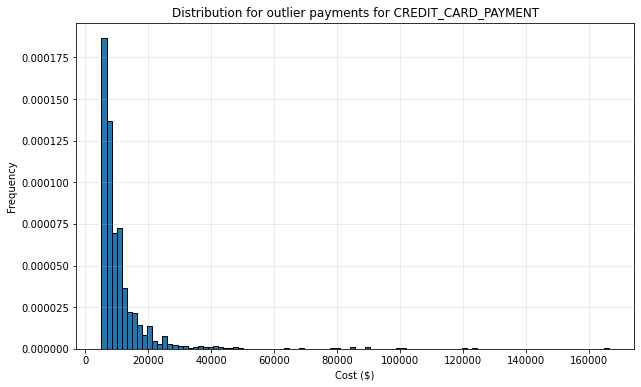

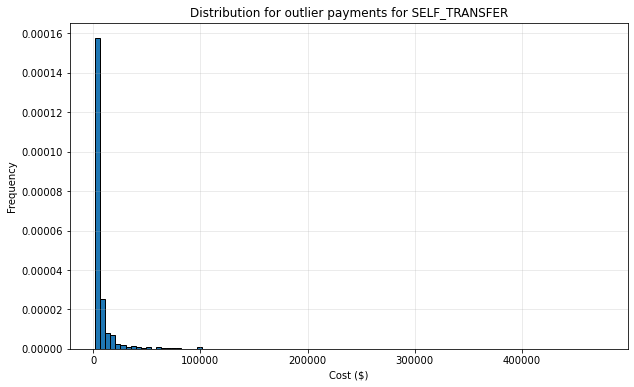

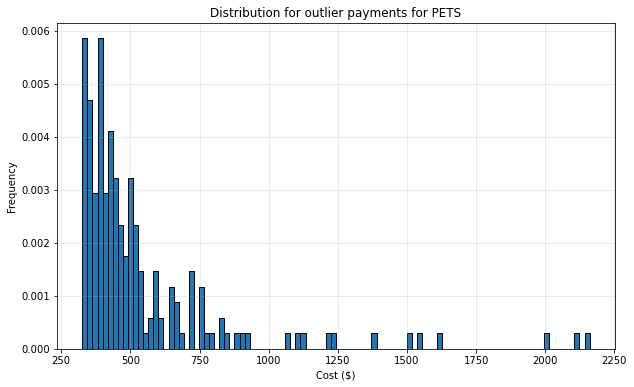

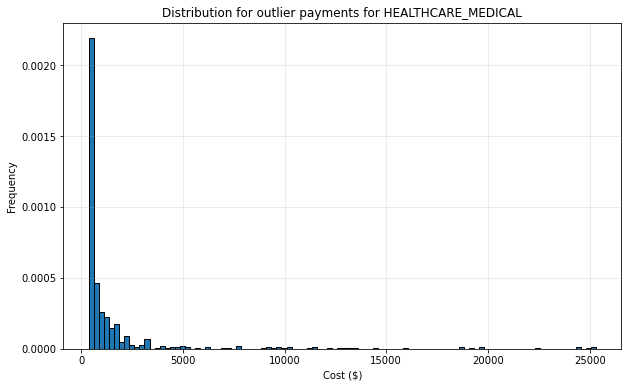

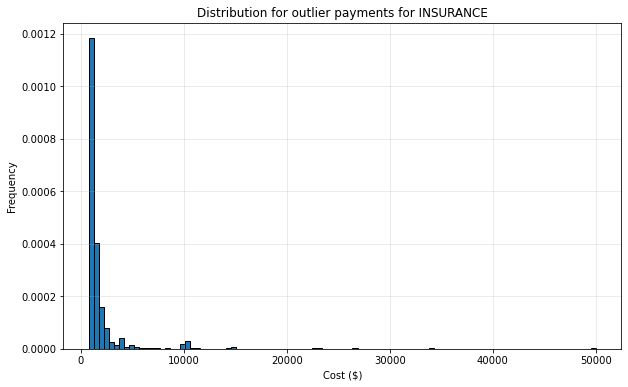

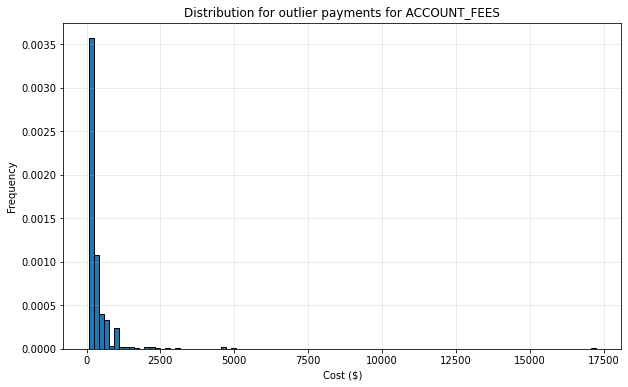

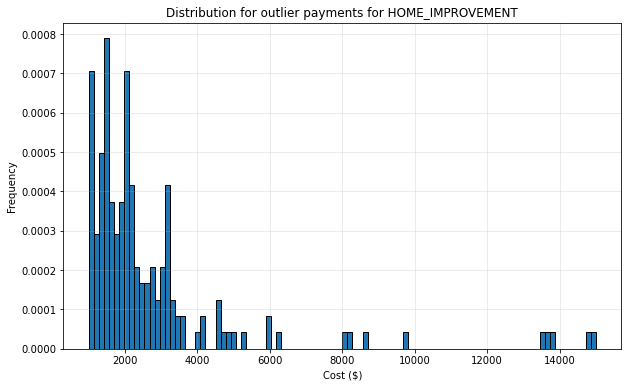

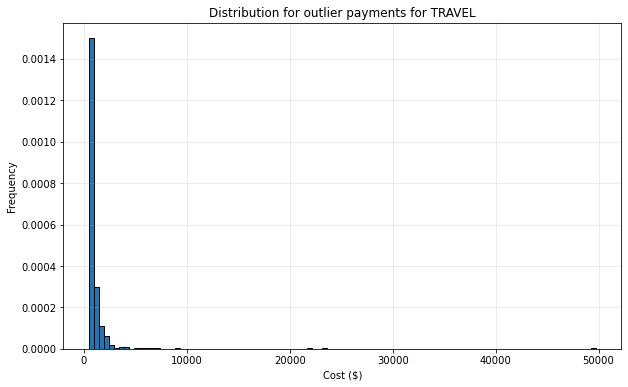

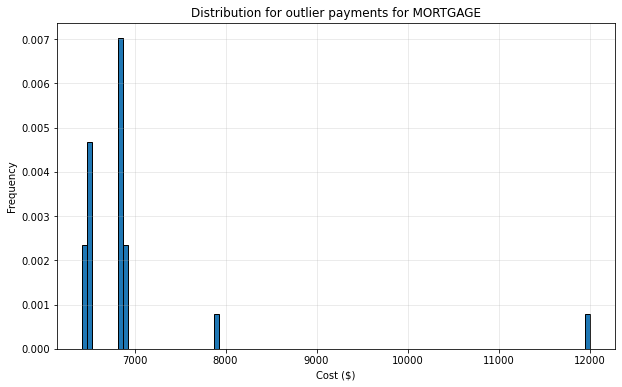

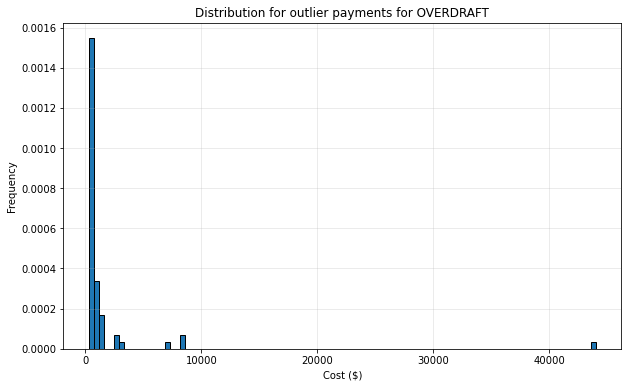

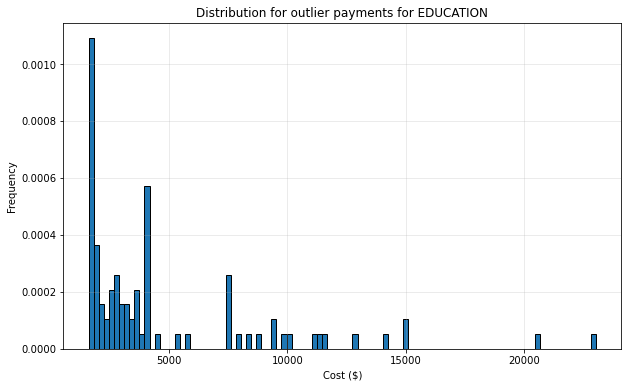

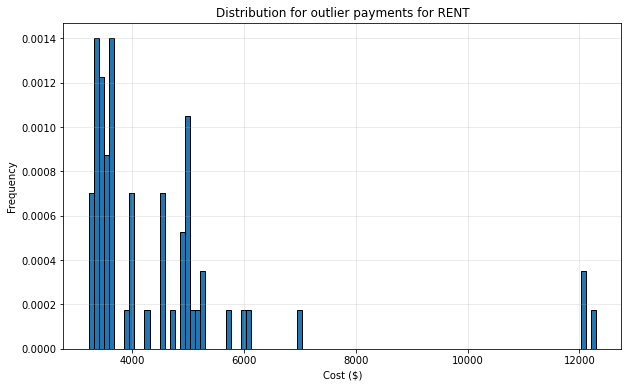

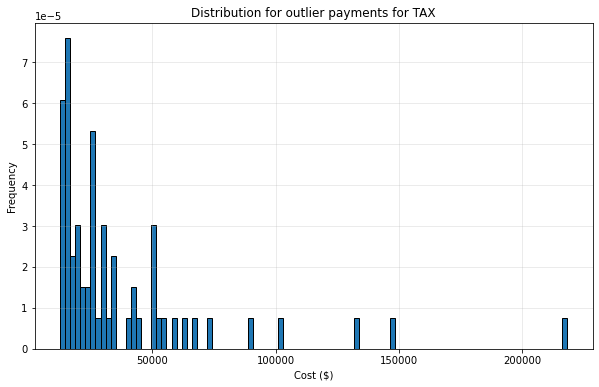

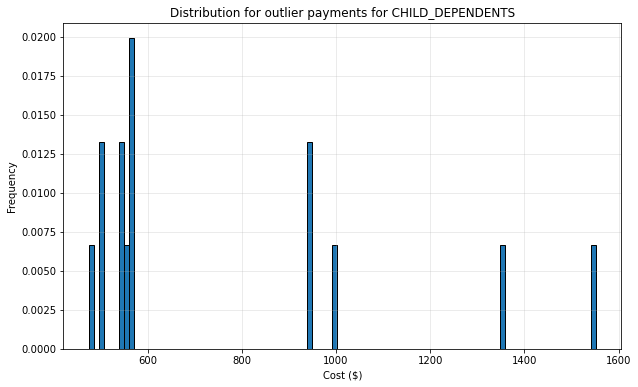

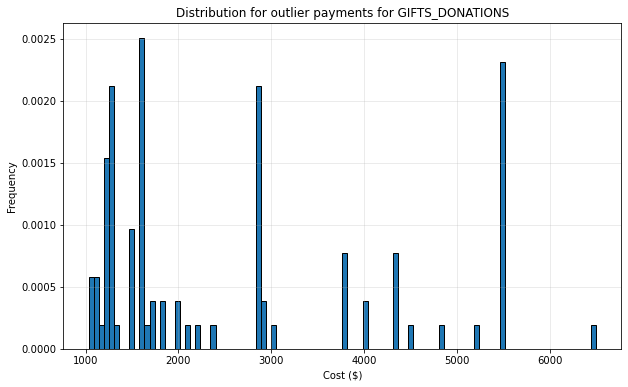

/opt/conda/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


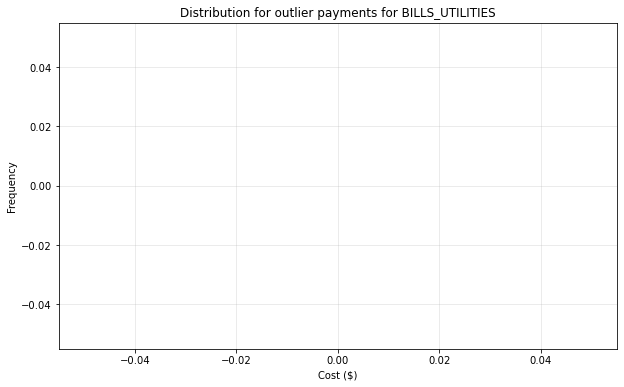

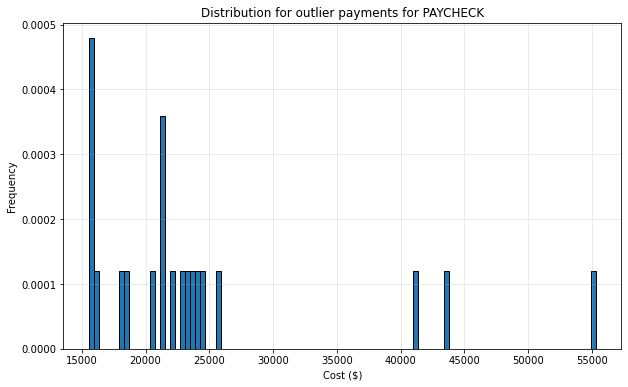

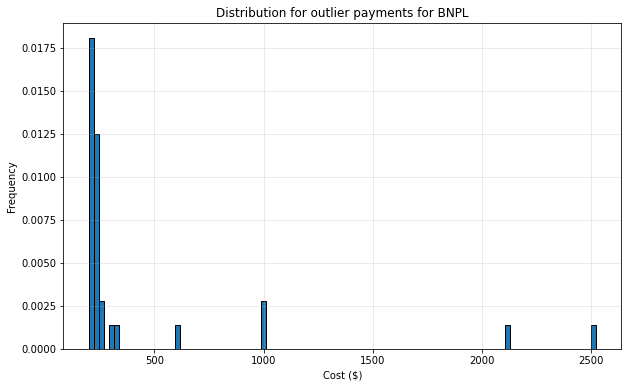

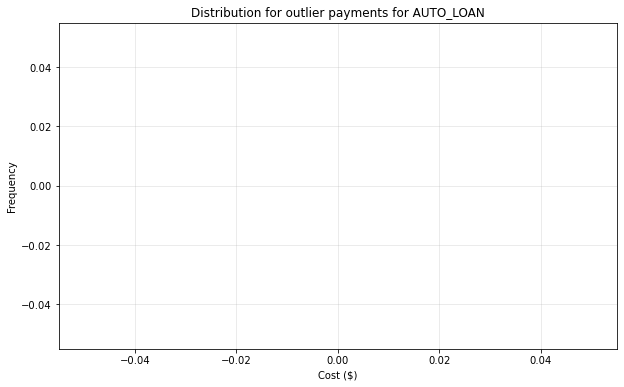

In [37]:
# outliers for outflows
categories = outflows["category"].unique()

# plotting all spending for different categories
for cat in categories:
    # limit to 95% of the spending (ignoring the top 5%)
    spending = outflows[outflows["category"] == cat]["amount"]

    threshold = np.percentile(spending, 98)
    outliers = spending[spending > threshold]

    plt.figure(figsize=(10, 6))
    plt.hist(outliers, bins=100, edgecolor="black", density=True)

    plt.xlabel(f"Cost ($)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution for outlier payments for {cat}")

    plt.grid(True, alpha=0.3)
    plt.show()

In [38]:
top_merchant_outflow_all = outflows.groupby(['category', 'memo'])[['prism_consumer_id']].count().sort_values(by='prism_consumer_id', ascending=False).groupby('category').head(1).reset_index()

In [39]:
top_merchant_outflow_all.head()

,category,memo,prism_consumer_id
0,EXTERNAL_TRANSFER,EXTERNAL_TRANSFER,320998
1,AUTOMOTIVE,AUTOMOTIVE,208579
2,ATM_CASH,ATM_CASH,117651
3,UNCATEGORIZED,UNCATEGORIZED,117409
4,LOAN,LOAN,90945


In [40]:
# remove category where the memo is exactly the same

top_merchant_outflow = top_merchant_outflow_all[top_merchant_outflow_all['category'] != top_merchant_outflow_all['memo']]

In [41]:
top_merchant_outflow

,category,memo,prism_consumer_id
11,GENERAL_MERCHANDISE,Amazon,31725
12,GROCERIES,Walmart,31619
14,FOOD_AND_BEVERAGES,McDonald's,22670
16,TRAVEL,Uber,7989
20,PETS,PetSmart,1450
23,OVERDRAFT,Overdraft Item Fee,374
24,EDUCATION,Teacherspayteachers.com,90
25,MORTGAGE,HUNTINGTON MORTG ONLINE PMT XXXXXX,52
26,RENT,SOUTHERN INVESTO WEB PMTS,47
